In [2]:
# AUTHOR: KATS JAYATHILAKA - 209338R
# DESCRIPTION: This is an assignment done on neural networks for the machine learnining module - MSc2020
#              Classification of MNIST dataset using a deep neural network

In [3]:
# importing tensorflow lib
import tensorflow as tf

In [4]:
# importing built-in MNIST dataset
mnist = tf.keras.datasets.mnist  # 28x28 images of hand-written digits

In [5]:
# splitting into train and test sets by the default proportions
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
# imnporting libs for train test splitting
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
x = np.concatenate((x_train, x_test))  # join all rows of attribute data
y = np.concatenate((y_train, y_test))  # join all target classes

In [8]:
TRAIN_SIZE = 0.80  # custom train test split proportion

# Randome state is set to my index no.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=TRAIN_SIZE, random_state=209338)

In [9]:
# importing plotting libs
import matplotlib.pyplot as plt

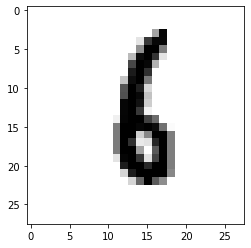

6

In [10]:
# previewing the image and the target class
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
y_train[0]

In [11]:
# z-score standardization of attribute data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [14]:
# adding some noise to the data
NOISE_FACTOR = 0.10

x_train_noisy = x_train + NOISE_FACTOR * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + NOISE_FACTOR * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

array([[[0.        , 1.        , 0.0710116 , ..., 0.        ,
         0.76576317, 0.        ],
        [0.        , 0.        , 0.59927469, ..., 1.        ,
         0.        , 1.        ],
        [0.35178405, 0.        , 0.27635357, ..., 0.10222898,
         0.23612027, 0.        ],
        ...,
        [0.40609065, 0.88000815, 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.57545257, 0.05009033, 0.        , ..., 0.60316448,
         0.        , 0.        ],
        [0.        , 0.        , 0.54387655, ..., 0.79476228,
         0.        , 0.        ]],

       [[0.43494143, 0.32786152, 0.65278252, ..., 0.        ,
         0.        , 1.        ],
        [0.        , 0.        , 0.14203925, ..., 0.74990621,
         0.80734925, 0.19050073],
        [0.        , 0.56574325, 0.11001634, ..., 0.04969605,
         0.        , 0.        ],
        ...,
        [0.        , 1.        , 0.        , ..., 1.        ,
         0.67948619, 0.        ],
        [0.9

In [ ]:
# previewing the image using the standardized data
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show

In [ ]:
# creating the Deep Neural Network Model
model = tf.keras.models.Sequential()  # feed-forward model

# adding input layer by flattening the input attributes into a single dimension'
model.add(tf.keras.layers.Flatten())

# adding hidden layers
model.add(tf.keras.layers.Dense(256, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.keras.activations.relu))

# adding output layer
model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))

# compllie the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
EPOCHS = 20

# training for multiple epochs
model.fit(x_train, y_train, epochs=EPOCHS)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)